# Exercícios - Introdução a Pandas

O objetivo desse notebook é ajudar na fixação dos conteúdos da aula de [Introdução a Pandas]().  

Caso haja alguma dúvida, consulte o material e as referências bibliográficas, mas também estamos à disposição por e-mail, slack ou telegram! Não hesite em falar conosco =D

## Estruturas

### Serie

In [1]:
# primeira coisa que se deve fazer para utilizar uma biblioteca....
import pandas as pd

In [2]:
# declare um dicionário com nomes de alunos e suas notas
myd = {'Leo': 3, 'Bob': 6.7, 'Lala': 10.0}

In [3]:
# imprima o dicionario
myd

{'Leo': 3, 'Bob': 6.7, 'Lala': 10.0}

In [4]:
# crie uma Serie utilizando esse dicionario
mys = pd.Series(myd)

In [5]:
# imprima a serie
mys

Leo      3.0
Bob      6.7
Lala    10.0
dtype: float64

In [6]:
# veja os indices da Serie
mys.index

Index(['Leo', 'Bob', 'Lala'], dtype='object')

In [7]:
# veja a primeira nota
mys[0]

3.0

In [8]:
# veja a maior nota
mys.max()

10.0

In [9]:
# veja o aluno que tem a maior nota]
# (Dica: esse vai exigir uma pesquisa)
mys.idxmax()

'Lala'

## Dataframe

In [10]:
# crie um Dataframe com os mesmos alunos. Ele deve ter como features o nome do aluno, 
# a nota da prova, a nota do trabalho e a nota do seminário 
df = pd.DataFrame(index = [0, 1, 2])
df['nome'] = ['Leo', 'Bob', 'Lala']
df['prova'] = [3, 6.7, 10.0]
df['trabalho'] = [10, 6, 10.0]
df['seminario'] = [5, 8, 5.0]

In [11]:
# salve esse dataframe como um arquivo no formato CSV, tendo ';' como separador
df.to_csv('alunos-example.csv', sep = ';', index=False)

## Leitura de Dados

In [12]:
# leia o arquivo que você acabou de salvar com as informações dos alunos
df = pd.read_csv('alunos-example.csv', sep = ';')

## Visualização do Dataframe

In [13]:
# veja se os nomes das colunas para garantir que estão corretas
df.columns

Index(['nome', 'prova', 'trabalho', 'seminario'], dtype='object')

In [14]:
# veja se o dataframe tem o mesmo tamanho que tinha quando você o salvou
df.shape

(3, 4)

In [15]:
# veja os tipos das colunas e se fazem sentido
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
nome         3 non-null object
prova        3 non-null float64
trabalho     3 non-null float64
seminario    3 non-null float64
dtypes: float64(3), object(1)
memory usage: 176.0+ bytes


In [16]:
# imprima os 3 primeiros exemplos usando a função head
df.head(3)

,nome,prova,trabalho,seminario
0,Leo,3.0,10.0,5.0
1,Bob,6.7,6.0,8.0
2,Lala,10.0,10.0,5.0


In [17]:
# imprima os 4 últimos exemplos usando a função tail
df.tail(4)

,nome,prova,trabalho,seminario
0,Leo,3.0,10.0,5.0
1,Bob,6.7,6.0,8.0
2,Lala,10.0,10.0,5.0


## Seleção dos dados

In [18]:
# imprima as notas das provas
df['prova']

0     3.0
1     6.7
2    10.0
Name: prova, dtype: float64

In [19]:
# imprima as informações do primeiro aluno da tabela
df.iloc[0]

nome         Leo
prova          3
trabalho      10
seminario      5
Name: 0, dtype: object

In [20]:
# imprima as informações do aluno cuja label é 1
df.iloc[1]

nome         Bob
prova        6.7
trabalho       6
seminario      8
Name: 1, dtype: object

In [21]:
# altere a nota da prova do primeiro aluno para 5
df.at[0, 'prova'] = 5

In [22]:
# altere a nota do seminario do aluno cuja label é 1 para 10
df.at[1, 'seminario'] = 9

## Indexação booleana

In [23]:
# cheque quais alunos tem nota de prova maior que 5
df['prova'] > 5

0    False
1     True
2     True
Name: prova, dtype: bool

In [24]:
# cheque quais alunos foram aprovados (nota da prova >= 5 e média entre trabalho e seminário >= 5)


In [25]:
# conte quantos alunos reprovaram em pelo menos uma das avaliações (n)
~(df['prova'] > 5) & ((df['trabalho'] + df['seminario'])/2 >= 5)

0     True
1    False
2    False
dtype: bool

In [26]:
sum(~(df['prova'] > 5) & ((df['trabalho'] + df['seminario'])/2 >= 5))

1

## Operações

In [27]:
# veja a média da turma em cada avaliação
df.mean()

prova        7.233333
trabalho     8.666667
seminario    6.333333
dtype: float64

In [28]:
# veja a maior e a menor nota
df.max()

nome         Leo
prova         10
trabalho      10
seminario      9
dtype: object

In [29]:
# crie uma nota feature no dataframe com a média do aluno
df['media'] = (df['prova'] + df['seminario'] + df['trabalho'])/3
df

,nome,prova,trabalho,seminario,media
0,Leo,5.0,10.0,5.0,6.666667
1,Bob,6.7,6.0,9.0,7.233333
2,Lala,10.0,10.0,5.0,8.333333


## Apply

In [30]:
# crie uma feature nova contendo a maior nota que o aluno tirou dentre todas as avaliações
df['max'] = df.apply(lambda x : max(x['prova'], x['trabalho'], x['seminario']), axis=1)
df

,nome,prova,trabalho,seminario,media,max
0,Leo,5.0,10.0,5.0,6.666667,10.0
1,Bob,6.7,6.0,9.0,7.233333,9.0
2,Lala,10.0,10.0,5.0,8.333333,10.0


## Funções Úteis

In [31]:
# quantos alunos tiraram cada nota na prova?
df['prova'].value_counts()

6.7     1
10.0    1
5.0     1
Name: prova, dtype: int64

In [32]:
# selecione as duas notas de trabalho mais frequentes
# (O que acontece se tivermos um empate triplo?)
df['prova'].value_counts()

6.7     1
10.0    1
5.0     1
Name: prova, dtype: int64

In [33]:
# veja o resumo estatístico da turma
df.describe()

,prova,trabalho,seminario,media,max
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,7.233333,8.666667,6.333333,7.411111,9.666667
std,2.542309,2.309401,2.309401,0.847436,0.577350
min,5.000000,6.000000,5.000000,6.666667,9.000000
25%,5.850000,8.000000,5.000000,6.950000,9.500000
50%,6.700000,10.000000,5.000000,7.233333,10.000000
75%,8.350000,10.000000,7.000000,7.783333,10.000000
max,10.000000,10.000000,9.000000,8.333333,10.000000


## Dados faltantes

In [34]:
# insira um novo aluno na tabela, o qual não tem nenhuma nota
df = df.append({'nome': 'Fred'}, ignore_index=True)
df

,nome,prova,trabalho,seminario,media,max
0,Leo,5.0,10.0,5.0,6.666667,10.0
1,Bob,6.7,6.0,9.0,7.233333,9.0
2,Lala,10.0,10.0,5.0,8.333333,10.0
3,Fred,NaN,NaN,NaN,NaN,NaN


In [35]:
# para o aluno que não tem nenhuma nota, atribua a ele a média da turma
df = df.fillna(df.mean())
df

,nome,prova,trabalho,seminario,media,max
0,Leo,5.000000,10.000000,5.000000,6.666667,10.000000
1,Bob,6.700000,6.000000,9.000000,7.233333,9.000000
2,Lala,10.000000,10.000000,5.000000,8.333333,10.000000
3,Fred,7.233333,8.666667,6.333333,7.411111,9.666667


## Plot

In [36]:
# veja a distribuição das notas
df['prova'].plot.bar()

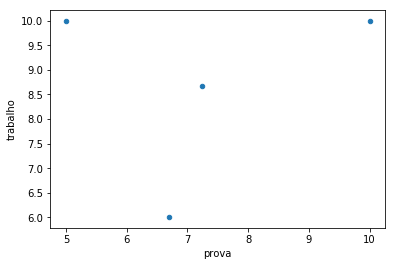

In [37]:
# cheque a relação entre as notas da prova e do trabalho
df.plot.scatter(x = 'prova', y = 'trabalho')

prova trabalho
prova seminario
prova media
prova max
trabalho seminario
trabalho media
trabalho max
seminario media
seminario max
media max


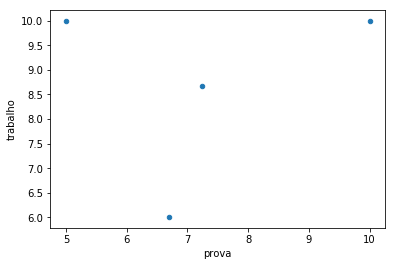

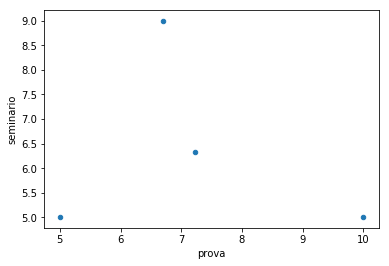

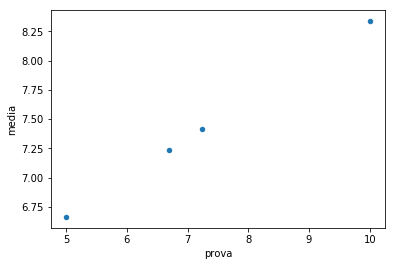

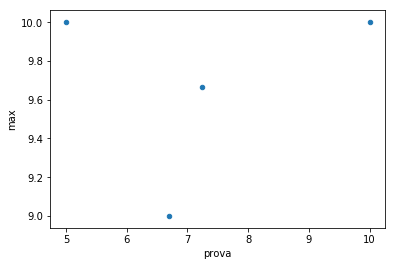

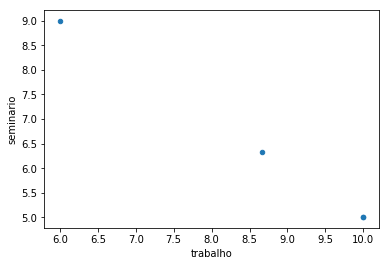

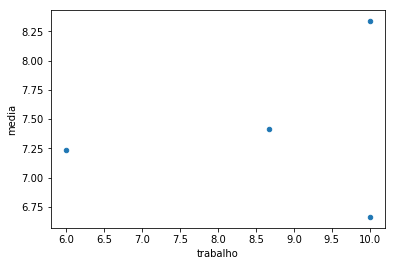

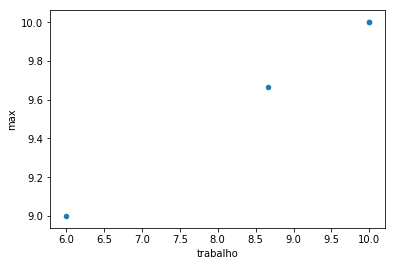

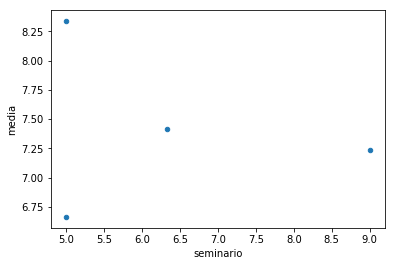

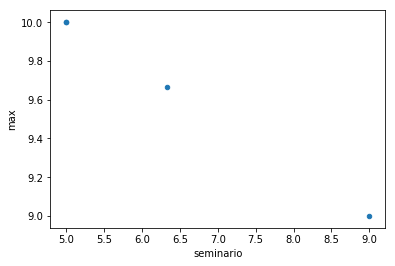

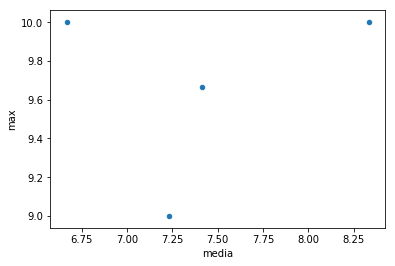

In [38]:
# cheque a relação entre as notas duas a duas
cols = df.columns.tolist()
cols.remove('nome')

for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        print(cols[i], cols[j])
        df.plot.scatter(x = cols[i], y = cols[j])